In [ ]:
## Activity 3


## As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). 
## That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define file paths
file = 'Data_Marketing_Customer_Analysis_Round3.csv'

# Read CSV files
df = pd.read_csv(file)

#clean data 
def cleandata(i):
    if i == 'F':
        i = 'Female'
    elif i == 'M':
        i = 'Male'
    return i

#clean gender column
df["gender"] = df["gender"].apply(clean_data)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [ ]:
## Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
## (You can use np.number and np.object to select the numerical data types and categorical data types respectively).

In [249]:
categorical_df = df.select_dtypes(include=object)
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [250]:
numerical = df.select_dtypes(include = np.number)

In [251]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [252]:
exp1 = df.groupby(['region','gender','education','policy_type','vehicle_class'])['total_claim_amount'].count().reset_index()
exp1

,region,gender,education,policy_type,vehicle_class,total_claim_amount
0,central,f,bachelor,corporate auto,four-door car,47
1,central,f,bachelor,corporate auto,luxury car,2
2,central,f,bachelor,corporate auto,luxury suv,2
3,central,f,bachelor,corporate auto,sports car,4
4,central,f,bachelor,corporate auto,suv,18
...,...,...,...,...,...,...
518,west region,m,master,personal auto,suv,19
519,west region,m,master,personal auto,two-door car,23
520,west region,m,master,special auto,four-door car,1
521,west region,m,master,special auto,suv,2


In [93]:
exp2 = df.groupby(['region','gender'])['total_claim_amount'].count().reset_index()
exp2

,region,gender,total_claim_amount
0,central,f,1585
1,central,m,1486
2,east,f,489
3,east,m,440
4,north west,f,1563
5,north west,m,1448
6,west region,f,1832
7,west region,m,1846


In [98]:
exp3 = df.groupby(['gender'])['total_claim_amount'].count().reset_index()
exp3

,gender,total_claim_amount
0,f,5469
1,m,5220


In [99]:
exp4 = df.groupby(['education','gender'])['total_claim_amount'].count().reset_index()
exp4#need to correct the typo in bachelors

,education,gender,total_claim_amount
0,bachelor,f,1669
1,bachelor,m,1541
2,college,f,1583
3,college,m,1558
4,doctor,f,194
5,doctor,m,195
6,high school or below,f,1554
7,high school or below,m,1522
8,master,f,469
9,master,m,404


In [102]:
def bachelor_name(i):
    if i in ['', 'Bachelors']:
        return 'Bachelor'
    else:
        return i
df["education"] = list(map(bachelor_name, df["education"]))

In [103]:
exp4 = df.groupby(['education','gender'])['total_claim_amount'].count().reset_index()
exp4 #need to correct the typo in bachelors

,education,gender,total_claim_amount
0,bachelor,f,1669
1,bachelor,m,1541
2,college,f,1583
3,college,m,1558
4,doctor,f,194
5,doctor,m,195
6,high school or below,f,1554
7,high school or below,m,1522
8,master,f,469
9,master,m,404


In [253]:
## Use seaborn library to construct distribution plots for the numerical variables

<AxesSubplot:title={'center':'Total_Claim_Amount by Education'}, xlabel='total_claim_amount', ylabel='education'>

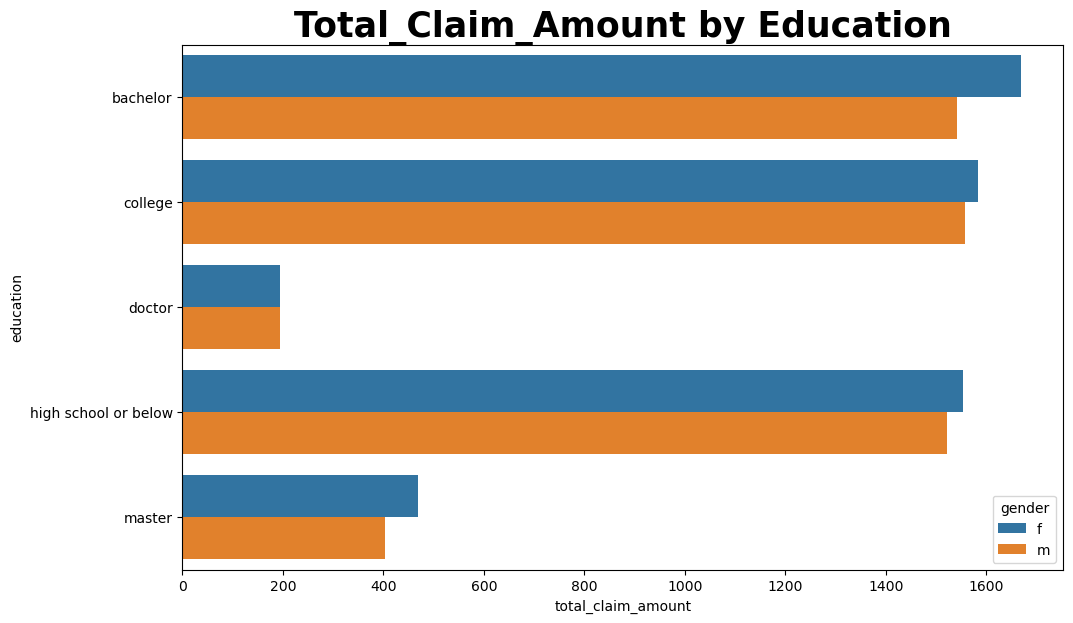

In [254]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,3)
plt.title('Total_Claim_Amount by Education', size='25', fontweight='bold')

# sns: This is an instance of the Seaborn library
# x: This parameter sets the data to be used for the x-axis. In this case, it is using the 'total_claim_amount' column from a pandas DataFrame called 'exp4'.
# y: This parameter sets the data to be used for the y-axis. In this case, it is using the 'education' column from the 'exp4' DataFrame.
# hue: This parameter adds a third dimension to the plot by assigning different colors to each category within the 'gender' column of the 'exp4' DataFrame.

sns.barplot(x = exp4['total_claim_amount'],y = exp4['education'], hue = exp4['gender'])

In [255]:
exp5 = df.groupby(['policy_type'])['total_claim_amount'].count().reset_index()
exp5

,policy_type,total_claim_amount
0,corporate auto,2312
1,personal auto,7937
2,special auto,440


In [256]:
exp6 = df.groupby(['vehicle_class'])['total_claim_amount'].count().reset_index()
exp6

,vehicle_class,total_claim_amount
0,four-door car,5424
1,luxury car,199
2,luxury suv,213
3,sports car,565
4,suv,2103
5,two-door car,2185


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='income'>

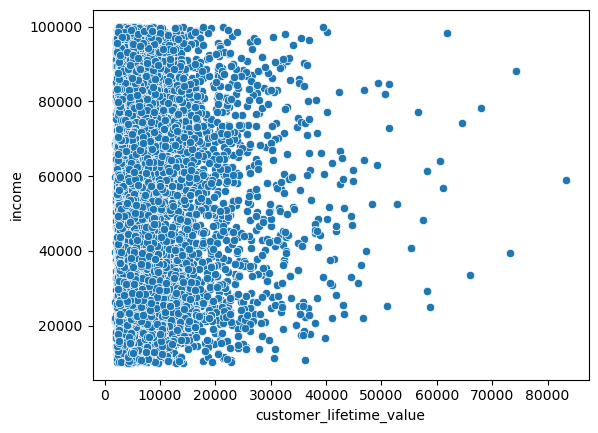

In [257]:
sns.scatterplot(x=numerical['customer_lifetime_value'],y=numerical['income'])

<AxesSubplot:xlabel='income', ylabel='monthly_premium_auto'>

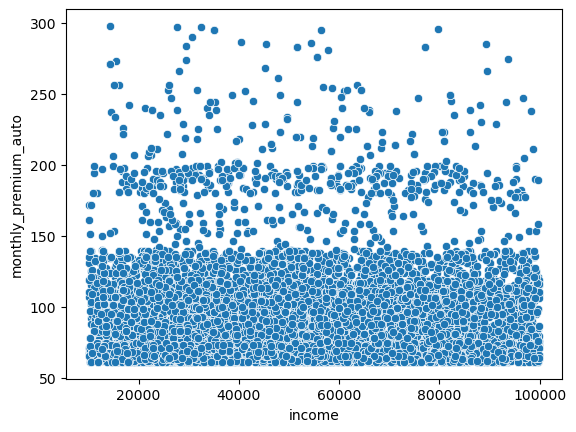

In [258]:
sns.scatterplot(x=numerical['income'],y=numerical['monthly_premium_auto'])

<AxesSubplot:xlabel='income', ylabel='number_of_policies'>

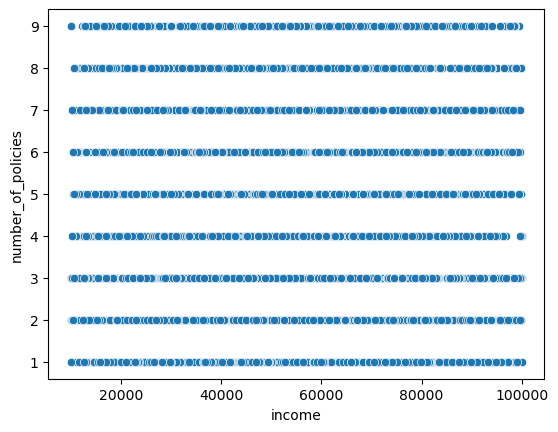

In [259]:
sns.scatterplot(x=numerical['income'],y=numerical['number_of_policies'])

<AxesSubplot:xlabel='income', ylabel='months_since_policy_inception'>

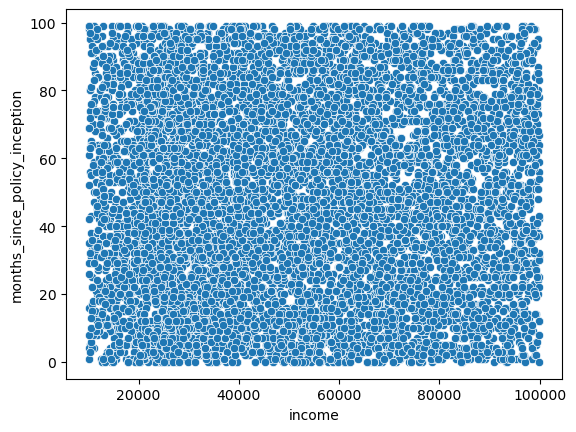

In [260]:
sns.scatterplot(x=numerical['income'],y=numerical['months_since_policy_inception'])

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='months_since_last_claim'>

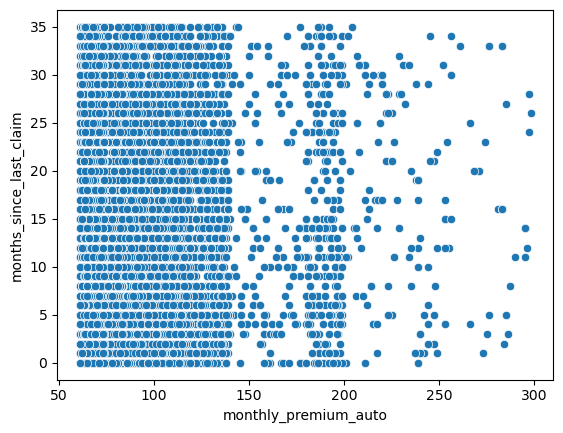

In [261]:
sns.scatterplot(x=numerical['monthly_premium_auto'],y=numerical['months_since_last_claim'])

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='total_claim_amount'>

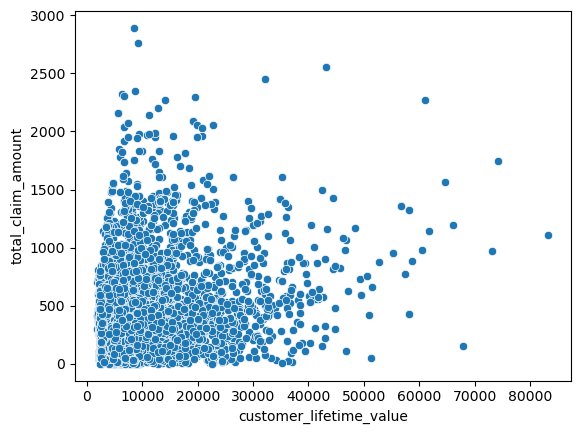

In [262]:
sns.scatterplot(x=numerical['customer_lifetime_value'],y=numerical['total_claim_amount'])

<AxesSubplot:xlabel='income', ylabel='monthly_premium_auto'>

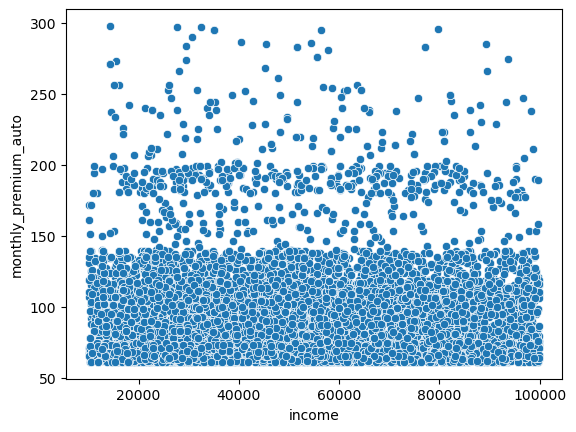

In [128]:
sns.scatterplot(x=numerical['income'],y=numerical['monthly_premium_auto'])

In [ ]:
## Use Matplotlib to construct histograms

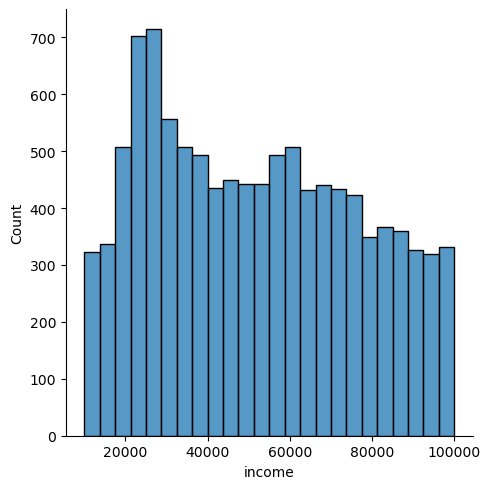

In [146]:
sns.displot(numerical['income'])

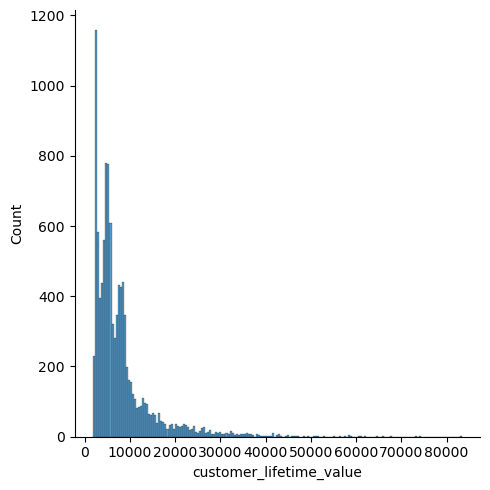

In [263]:
sns.displot(numerical['customer_lifetime_value'])

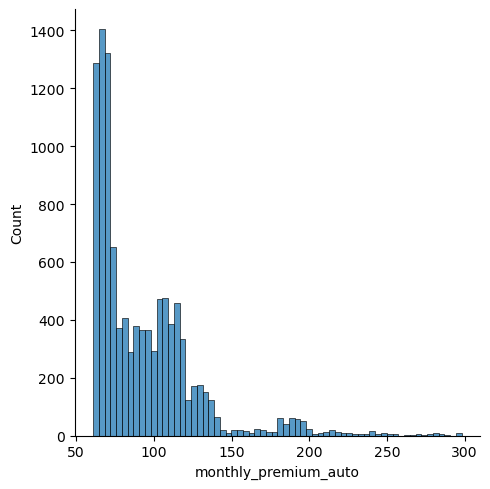

In [264]:
sns.displot(numerical['monthly_premium_auto'])

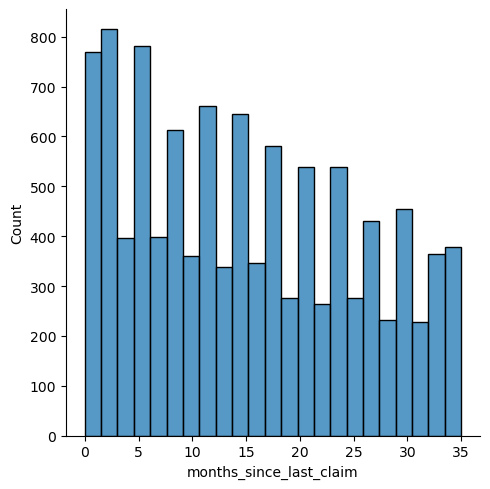

In [265]:
sns.displot(numerical['months_since_last_claim'])

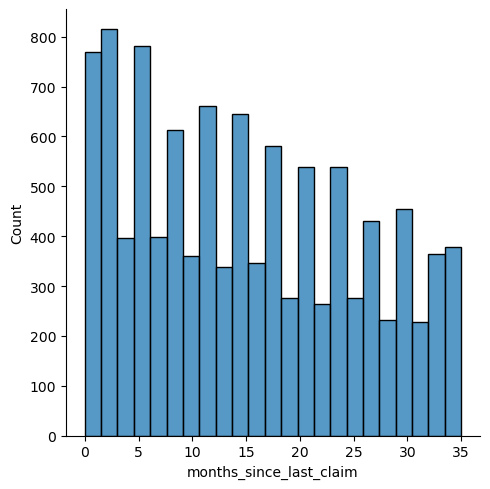

In [266]:
sns.displot(numerical['months_since_last_claim'])

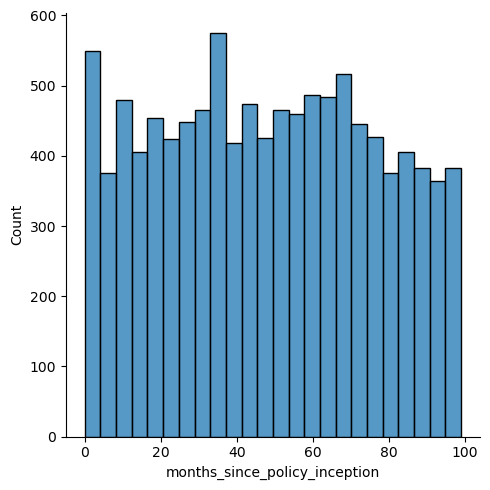

In [267]:
sns.displot(numerical['months_since_policy_inception'])

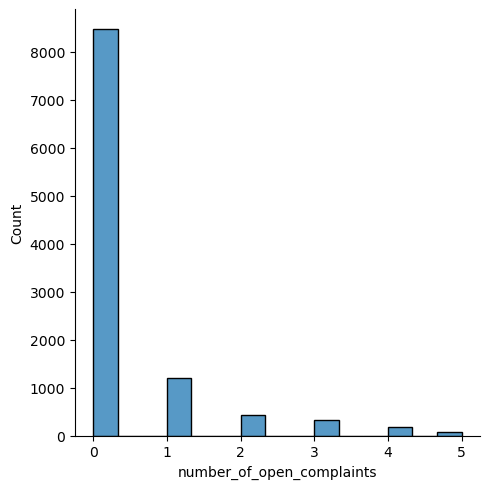

In [268]:
sns.displot(numerical['number_of_open_complaints'])

In [269]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


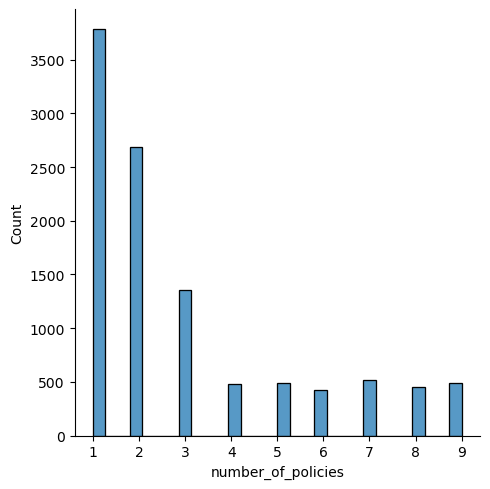

In [270]:
sns.displot(numerical['number_of_policies'])

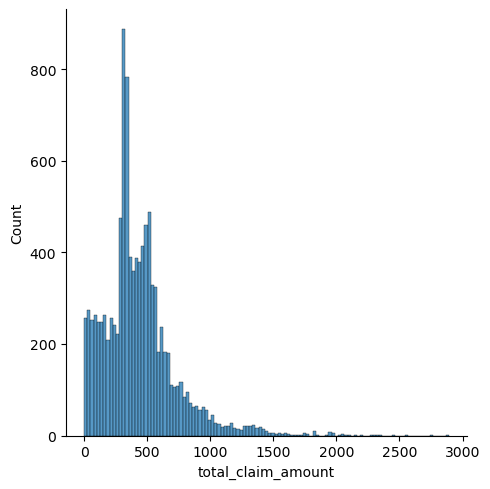

In [271]:
sns.displot(numerical['total_claim_amount'])

In [ ]:
## Plot the Correlation Heatmap

<AxesSubplot:>

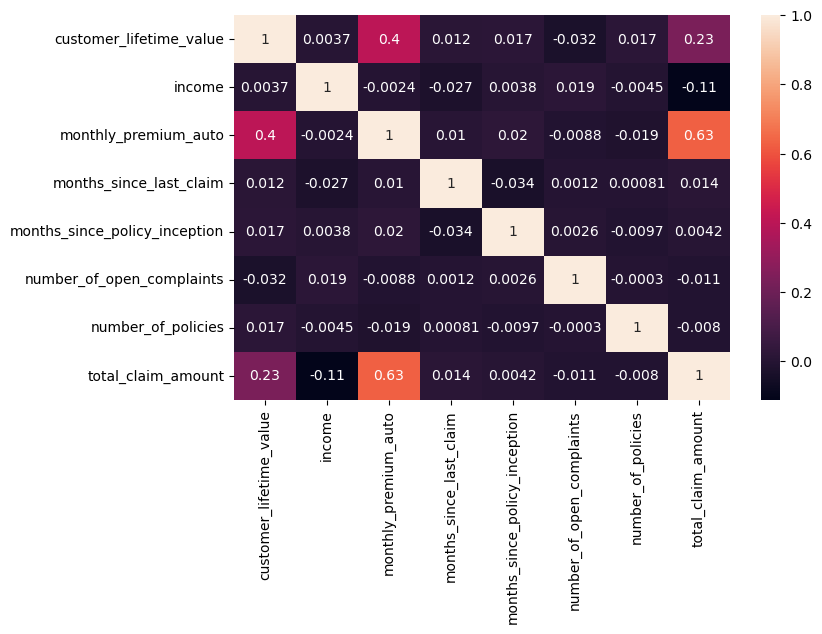

In [272]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True) #NAN affect the heatmap. need to remove NANs?

In [ ]:
## Activity 4

In [ ]:
## Show a plot of the total number of responses

In [273]:
categorical_df = df.select_dtypes(include=object)
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


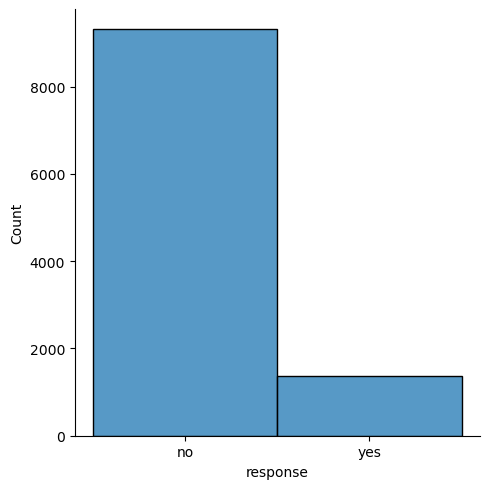

In [274]:
# Count the number of rows of a Pandas dataframe

sns.displot(categorical_df['response'])

In [275]:
categorical_df["response"].value_counts()

no     9316
yes    1373
Name: response, dtype: int64

sales_channel  response
agent          no          3340
branch         no          2665
call center    no          1890
web            no          1421
agent          yes          679
branch         yes          310
call center    yes          209
web            yes          175
dtype: int64

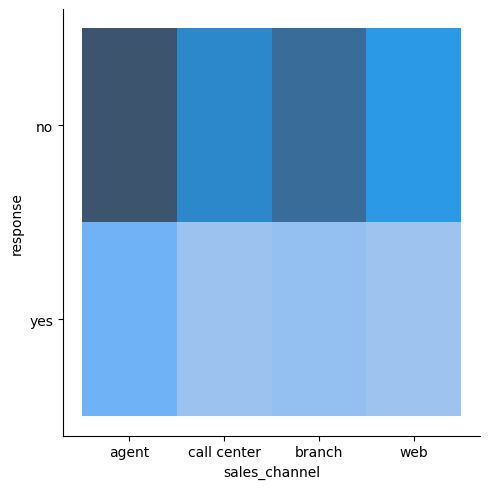

In [222]:
## Show a plot of the response by the sales channel

sns.displot(x=categorical_df['sales_channel'],y=categorical_df['response'])
categorical_df[["sales_channel", "response"]].value_counts()

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

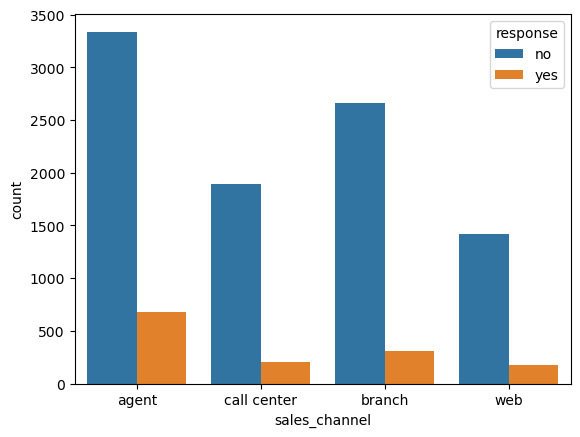

In [276]:
## Show a plot of the response by the sales channel

sns.countplot(x='sales_channel', hue='response', data=categorical_df)

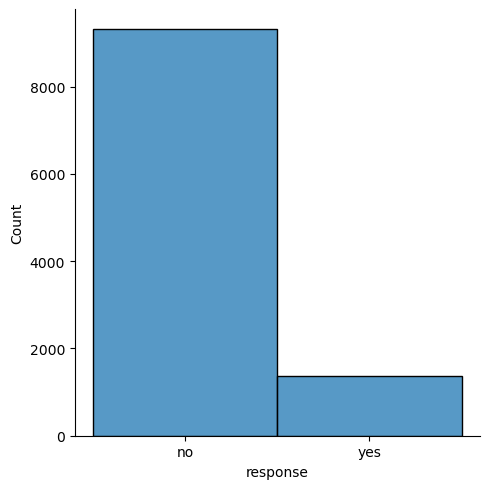

In [277]:
## Show a plot of the response by the total claim amount
sns.displot(categorical_df['response'])


In [278]:

filtered_data = categorical_df[categorical_df['response'] == "yes"]

sns.displot(filtered_data['total_claim_amount'])

KeyError: 'total_claim_amount'

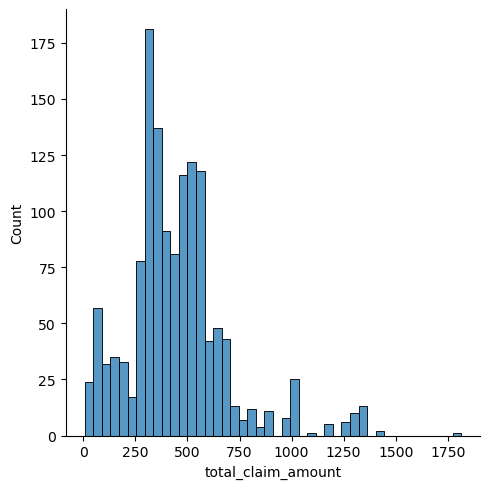

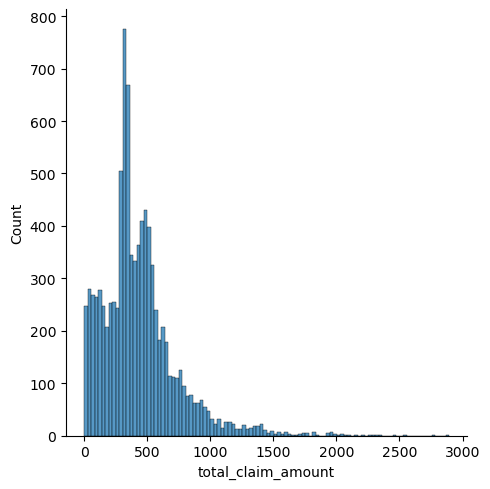

In [285]:
yes_responses = df.loc[df['response'] == 'yes']
sns.displot(yes_responses['total_claim_amount'])

no_responses = df.loc[df['response'] == 'no']
sns.displot(no_responses['total_claim_amount'])

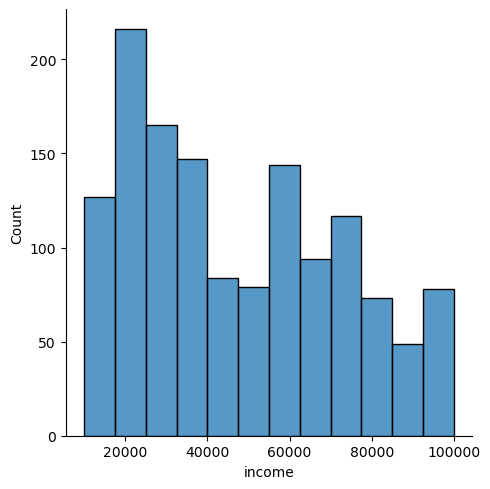

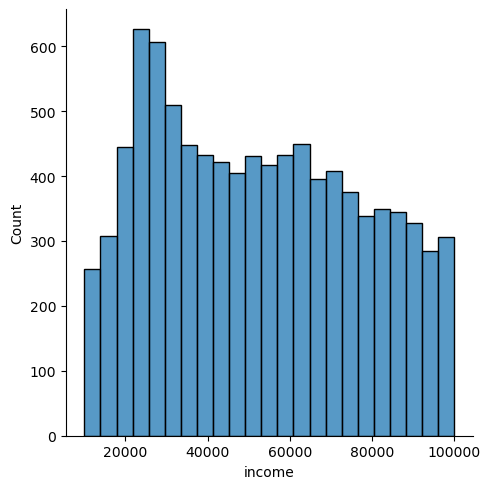

In [283]:
yes_responses = df.loc[df['response'] == 'yes']
sns.displot(yes_responses['income'])

no_responses = df.loc[df['response'] == 'no']
sns.displot(no_responses['income'])